In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from matplotlib import pyplot as plt 

# Store CSV into Dataframe 

In [2]:
eruptions = "Resources/eruptions.csv"
eruptions_data = pd.read_csv(eruptions)

volcano = "Resources/volcano.csv"
volcano_df = pd.read_csv(volcano)

events = "Resources/events.csv"
events_df = pd.read_csv(events)

damage = "Resources/damage.csv"
damage_df = pd.read_csv(damage)


# Transform eruptions dataframe

In [3]:
eruptions_data.dropna(subset=['start_year'], how='all', inplace=True)
eruptions_data['start_month'] = eruptions_data['start_month'].fillna(1)
eruptions_data['start_day'] = eruptions_data['start_day'].fillna(1)

eruptions_data.drop(eruptions_data[eruptions_data.start_year < 1800].index, inplace=True)
eruptions_data["start_month"].replace({0.0: 1}, inplace=True)
eruptions_data["start_day"].replace({0.0: 1}, inplace=True)
eruptions_data["end_day"].replace({0.0: 1}, inplace=True)
eruptions_data["end_month"].replace({0.0: 1}, inplace=True)
eruptions_data

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,252080,Witori,15022,Confirmed Eruption,NaN,4.0,1800.0,1.0,1.0,Tephrochronology,NaN,NaN,NaN,-5.576,150.516
6217,241030,Taranaki,13348,Confirmed Eruption,NaN,NaN,1800.0,1.0,1.0,Tephrochronology,NaN,NaN,NaN,-39.300,174.070
6218,390030,Deception Island,13182,Confirmed Eruption,N side caldera bay (near Telefon Bay),NaN,1800.0,1.0,1.0,Historical Observations,NaN,NaN,NaN,-63.001,-60.652
6219,344120,Concepcion,11046,Uncertain Eruption,NaN,2.0,1800.0,1.0,1.0,NaN,NaN,NaN,NaN,11.538,-85.622


In [4]:
eruptions_data.dropna(subset=['end_year'], how='all', inplace=True)
eruptions_data['end_month'] = eruptions_data['end_month'].fillna(1)
eruptions_data['end_day'] = eruptions_data['end_day'].fillna(1)

In [5]:
#Converting start date columns to strings and concatenating them to a datetime value.

eruptions_data['start_year'] = eruptions_data['start_year'].apply(lambda x: int(x))
eruptions_data['start_month'] = eruptions_data['start_month'].apply(lambda x: int(x))
eruptions_data['start_day'] = eruptions_data['start_day'].apply(lambda x: int(x))

eruptions_data['start_year'] = eruptions_data['start_year'].astype(str)
eruptions_data['start_month'] = eruptions_data['start_month'].astype(str)
eruptions_data['start_day'] = eruptions_data['start_day'].astype(str)

eruptions_data["start date"] = eruptions_data["start_year"] + '.' + eruptions_data["start_month"] + '.' + eruptions_data["start_day"]

In [6]:
#Converting end date columns to strings and concatenating them to a datetime value.
eruptions_data['end_year'] = eruptions_data['end_year'].apply(lambda x: int(x))
eruptions_data['end_month'] = eruptions_data['end_month'].apply(lambda x: int(x))
eruptions_data['end_day'] = eruptions_data['end_day'].apply(lambda x: int(x))

eruptions_data['end_year'] = eruptions_data['end_year'].astype(str)
eruptions_data['end_month'] = eruptions_data['end_month'].astype(str)
eruptions_data['end_day'] = eruptions_data['end_day'].astype(str)

eruptions_data["end date"] = eruptions_data["end_year"] + '.' + eruptions_data["end_month"] + '.' + eruptions_data["end_day"]

In [83]:
#Dropping uneccessary columns
clean_eruption_data = eruptions_data.drop(columns=['area_of_activity', 'evidence_method_dating','vei','eruption_category','start_year','start_month','start_day','end_year','end_month','end_day'])
clean_eruption_data['start date']= pd.to_datetime(clean_eruption_data['start date'])
clean_eruption_data['end date']= pd.to_datetime(clean_eruption_data['end date'])
clean_eruption_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 0 to 6209
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   volcano_number   3932 non-null   int64         
 1   volcano_name     3932 non-null   object        
 2   eruption_number  3932 non-null   int64         
 3   latitude         3932 non-null   float64       
 4   longitude        3932 non-null   float64       
 5   start date       3932 non-null   datetime64[ns]
 6   end date         3932 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 245.8+ KB


# Transform volcano dataframe

In [8]:
# Step 1: Getting all data from 1800 onwards ( last eruption date after 1800)

#there are some string "Unknown" in last eruption year, change it into 0
volcano_df2=volcano_df.replace(to_replace="Unknown",value="0")

#convert the last eruption year to integer 
volcano_df2["last_eruption_year"] = volcano_df2["last_eruption_year"].astype(int)

#then choose years greater than 1800 
volcano_df3=volcano_df2.loc[volcano_df2['last_eruption_year'] > 1800]

In [71]:
# Step 2: clean data--Remove columns we dont need and set primary key Volcano_number as index

# set primary key Volcano_number as index
#volcano_df3.set_index("volcano_number", inplace=True)

#remove irrelevant columns
volcano_df4=volcano_df3.drop(columns=["subregion","elevation","evidence_category","tectonic_settings","major_rock_1",  "major_rock_2","major_rock_3","major_rock_4","major_rock_5" ,"minor_rock_1","minor_rock_2","minor_rock_3","minor_rock_4","minor_rock_5"])
volcano_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 342080 to 221020
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   volcano_name              391 non-null    object 
 1   primary_volcano_type      391 non-null    object 
 2   last_eruption_year        391 non-null    int32  
 3   country                   391 non-null    object 
 4   region                    391 non-null    object 
 5   latitude                  391 non-null    float64
 6   longitude                 391 non-null    float64
 7   population_within_5_km    391 non-null    int64  
 8   population_within_10_km   391 non-null    int64  
 9   population_within_30_km   391 non-null    int64  
 10  population_within_100_km  391 non-null    int64  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 35.1+ KB


In [79]:
# Step 3: Getting average population by country within differnt distance 
country_5km=(volcano_df4.groupby('country')['population_within_5_km'].sum()).to_frame()
country_10km=(volcano_df4.groupby('country')['population_within_10_km'].sum()).to_frame()
country_30km=(volcano_df4.groupby('country')['population_within_30_km'].sum()).to_frame()
country_100km=(volcano_df4.groupby('country')['population_within_100_km'].sum()).to_frame()
#getting result into a dataframe 
population_df=pd.concat([country_5km, country_10km, country_30km,country_100km]).fillna(0.0)
population_df.head()

,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
country,,,,
Antarctica,0.0,0.0,0.0,0.0
Argentina,12.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0
Cameroon,328.0,0.0,0.0,0.0
Cape Verde,189.0,0.0,0.0,0.0


In [74]:
# sorting population by 5km and 
population_top30=population_df.nlargest(20,'population_within_5_km')
population_top30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Mexico to Iceland
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   population_within_5_km    20 non-null     float64
 1   population_within_10_km   20 non-null     float64
 2   population_within_30_km   20 non-null     float64
 3   population_within_100_km  20 non-null     float64
dtypes: float64(4)
memory usage: 800.0+ bytes


Text(0.5, 1.0, 'Total population lives within 5km of Volcano by country')

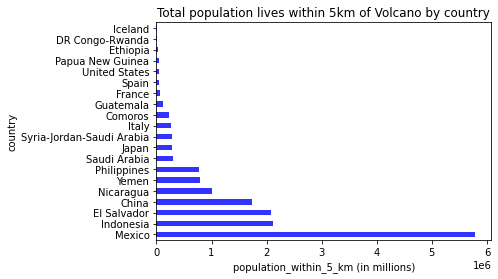

In [12]:

# plotting stack bar chart 
ax=population_top30['population_within_5_km'].plot(kind='barh', color='blue', width=.5, alpha=0.8)
ax.set_xlabel('population_within_5_km (in millions)')
ax.set_ylabel('country')
ax.set_title('Total population lives within 5km of Volcano by country')


# Transform event dataframe

In [13]:
# Create a filtered dataframe from specific columns
events_cols = ["volcano_number", "volcano_name", "eruption_number", "eruption_start_year", "event_number", "event_type", "event_date_year", "event_date_month", "event_date_day"  ]
events_df_transformed = events_df[events_cols].copy() 


In [14]:
# Clean the data by dropping duplicates and setting the index
events_df_transformed.drop_duplicates("event_number", inplace=True)
events_df_transformed.set_index("event_number", inplace=True)
events_df_transformed.dropna()


,volcano_number,volcano_name,eruption_number,eruption_start_year,event_type,event_date_year,event_date_month,event_date_day
event_number,,,,,,,,
100097,211010,Campi Flegrei,10041,1538,Fatalities,1538.0,10.0,6.0
100130,211020,Vesuvius,10050,79,Fatalities,79.0,8.0,25.0
100172,332010,Kilauea,10079,1924,Fatalities,1924.0,5.0,18.0
100460,211020,Vesuvius,13315,787,Fatalities,787.0,10.0,15.0
100492,211020,Vesuvius,13332,1631,Fatalities,1631.0,12.0,16.0
...,...,...,...,...,...,...,...,...
153194,261080,Sinabung,15404,2010,Ash Plume,2010.0,9.0,3.0
153195,261080,Sinabung,15404,2010,Explosion,2010.0,9.0,7.0
153196,261080,Sinabung,15404,2010,Ash Plume,2010.0,9.0,7.0


In [15]:
#check for occurences yearly
events_yearly = events_df_transformed['event_date_year'].value_counts().to_frame()


In [16]:
#get a feel for the data
events_df_transformed.describe()

,volcano_number,eruption_number,eruption_start_year,event_date_year,event_date_month,event_date_day
count,41322.000000,41322.000000,41322.000000,10007.000000,7132.000000,5923.000000
mean,296428.862616,15428.928029,850.534679,1365.646947,6.382081,15.461759
std,48713.188142,3190.705491,2298.526358,1707.332054,3.522029,8.959910
min,210010.000000,10001.000000,-11345.000000,-9650.000000,1.000000,1.000000
25%,263250.000000,12693.250000,1257.000000,1773.000000,3.000000,8.000000
50%,284210.000000,15334.500000,1884.000000,1912.000000,6.000000,15.000000
75%,342090.000000,18081.750000,1968.000000,1977.000000,9.000000,23.000000
max,600000.000000,22352.000000,2020.000000,2020.000000,12.000000,31.000000


In [17]:
#events after year 1800
events_df_recent = events_df_transformed.loc[events_df_transformed['event_date_year'] >= 1800]


In [18]:
#check for data after filtering by year
events_df_recent.describe()

,volcano_number,eruption_number,eruption_start_year,event_date_year,event_date_month,event_date_day
count,7287.000000,7287.000000,7287.000000,7287.000000,6329.000000,5301.000000
mean,288735.798134,15563.297379,1934.022369,1940.172087,6.378101,15.475382
std,43821.647124,3065.931252,180.124778,57.764083,3.530036,8.933085
min,211010.000000,10030.000000,-8050.000000,1800.000000,1.000000,1.000000
25%,261230.000000,13426.000000,1895.000000,1898.000000,3.000000,8.000000
50%,282110.000000,15602.000000,1952.000000,1953.000000,6.000000,15.000000
75%,332010.000000,17934.500000,1989.000000,1990.000000,10.000000,23.000000
max,390140.000000,22344.000000,2020.000000,2020.000000,12.000000,31.000000


In [19]:
#fill the null values in date to 1
events_df_fill = events_df_recent.fillna(1)

In [20]:
#covert dates
events_df_fill['event_date_year'] = events_df_fill['event_date_year'].apply(lambda x: int(x))
events_df_fill['event_date_month'] = events_df_fill['event_date_month'].apply(lambda x: int(x))
events_df_fill['event_date_day'] = events_df_fill['event_date_day'].apply(lambda x: int(x))

events_df_fill['event_date_year'] = events_df_fill['event_date_year'].astype(str)
events_df_fill['event_date_month'] = events_df_fill['event_date_month'].astype(str)
events_df_fill['event_date_day'] = events_df_fill['event_date_day'].astype(str)

events_df_fill["event_date"] = events_df_fill["event_date_year"] + '.' + events_df_fill["event_date_month"] 


In [80]:
#drop unnecessary columns
events_df_clean = events_df_fill.drop(['event_date_year','event_date_month', 'event_date_day'], axis = 1)
#final table
events_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7287 entries, 100148 to 153198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   volcano_number       7287 non-null   int64 
 1   volcano_name         7287 non-null   object
 2   eruption_number      7287 non-null   int64 
 3   eruption_start_year  7287 non-null   int64 
 4   event_type           7287 non-null   object
 5   event_date           7287 non-null   object
dtypes: int64(3), object(3)
memory usage: 398.5+ KB


# Transform damage dataframe

In [22]:
pd.set_option('max_columns',60)

In [23]:
list(damage_df.columns)

['volcanoName',
 'selectedEruption',
 'damages',
 'insuranceLosses',
 'totalDeaths',
 'areaLocation',
 'sources',
 'evacuation',
 'evacuationDuration',
 'displacedPersons',
 'homesAffected',
 'homesAffectedDollars',
 'agricultureArea',
 'agricultureAreaDollars',
 'cropType',
 'growingPeriod',
 'livestockAffected',
 'livestockAffectedDollars',
 'agricInfrastructure',
 'agricInfrastructureDollars',
 'forestArea',
 'forestAreaDollars',
 'roadsDestroyed',
 'roadsDestroyedDollars',
 'airportDestroyed',
 'airportDestroyedDollars',
 'bridgesDestroyed',
 'bridgesDestroyedDollars',
 'railroadDestroyed',
 'railroadDestroyedDollars',
 'portsDestroyed',
 'portsDestroyedDollars',
 'schoolsDestroyed',
 'schoolsDestroyedDollars',
 'hospitalsDestroyed',
 'hospitalsDestroyedDollars',
 'electricalGrid',
 'electricalGridDollars',
 'waterSupply',
 'waterSupplyDollars',
 'economicImpact',
 'timestamp',
 'User',
 'area_of_activity',
 'vei',
 'StartDate',
 'EndDate',
 'Duration',
 'volcano_number',
 'country

In [24]:
# show the top rows' values
damage_df.head()

,volcanoName,selectedEruption,damages,insuranceLosses,totalDeaths,areaLocation,sources,evacuation,evacuationDuration,displacedPersons,homesAffected,homesAffectedDollars,agricultureArea,agricultureAreaDollars,cropType,growingPeriod,livestockAffected,livestockAffectedDollars,agricInfrastructure,agricInfrastructureDollars,forestArea,forestAreaDollars,roadsDestroyed,roadsDestroyedDollars,airportDestroyed,airportDestroyedDollars,bridgesDestroyed,bridgesDestroyedDollars,railroadDestroyed,railroadDestroyedDollars,portsDestroyed,portsDestroyedDollars,schoolsDestroyed,schoolsDestroyedDollars,hospitalsDestroyed,hospitalsDestroyedDollars,electricalGrid,electricalGridDollars,waterSupply,waterSupplyDollars,economicImpact,timestamp,User,area_of_activity,vei,StartDate,EndDate,Duration,volcano_number,country,region,subregion,latitude,longitude,population_within_100_km,origin
0,Rabaul,Rabaul / 19-Sep 1994 -- 16-Apr 1995,110 000 \n(source #316). \n200 000 \n(source #...,120 000 \n(source #318).,5 \n(source # 316).,"The town of Rabaul. The surrounding villages, ...",[314] Bardintzeff Jacques Marie. Les risques ...,"Matupit Island, Rabaul Town and all villages w...","Permanent : ""authorities decided to resettle t...",80 000 \n(source #314).,"""Two thirds of buildings were destroyed. About...",USD 25 000 000 of damage in public housing.\n...,No data,No data,Cocoa \n(source #322).,Cocoa: low production between january to april...,No data,No data,No data,No data,No data,No data,Many roads were blocked.\n(source #324).,No data,"""During 1994, the volcanic eruption covered th...",No data,No data,No data,Not applicable,Not applicable,"""Tsunamis, probably resulting from the...",No data,Schools were destroyed.\n(source #327).,No data,Hospital and clinics were destroyed.\n(sourc...,No data,"""The power supply was shut down at the start o...",No data,Water supply was damaged. \n(source #327).\n,No data,"Damage to public infrastructure ( roads, air t...",881420,Hajare EL HADRI,Tavurvur and Vulcan,4.0,19/09/1994,16/04/1995,209.0,252140,Papua New Guinea,Melanesia and Australia,New Britain,-4.271,152.203,252121,Admin
1,Kelut,Kelut / 10-Feb 1990 -- 13-Mar 1990,8 000 \n(source #389).,No data,33\n(source #389).,The damaged area extend within a radius of ab...,[385] G. Kelud. Retrieved from: https://vsi.e...,No data,No data,60 000 \n(source #390).,2384 building damaged i.e 2053 houses wich wer...,No data,7 349 hectares of agricultural land were dama...,No data,"Rice, sugarcane, pineapple, cotton, cassava, c...",Rice main : harvesting period. (source #393).\...,No data,No data,No data,No data,No data,No data,No data,No data,Not impacted,0,No data,No data,No data,No data,Not applicable,Not applicable,199 schools damaged.\n(source #391).,No data,No data,No data,No data,No data,Most drinking water sources within 35 km radiu...,No data,No data,2491369,Hajare EL HADRI,NaN,4.0,10/02/1990,13/03/1990,31.0,263280,Indonesia,Indonesia,Java,-7.930,112.308,24999627,Admin
2,Mayon,Mayon / 09-Sep 1984 -- 06-Oct 1984,No data,No data,0 (source #340).,Pyroclastic flow affected southeast and east ...,[337] https://www.gmanetwork.com/news/news/nat...,"Daraga, Legaspi city, Guinobatan, Camalig, Lig...",No data,70 000 \n(source #342).,Thousands rendered homeless. ...,No data,"In Sto. Domingo, the major part of coconut pla...",No data,"Rice, coconuts, corn, vegetable.\n(source #343...",Coconuts : harvest throughout the year. ...,No data,No data,No data,No data,No data,No data,Legaspi Roads was washed out. \n(source #341...,No data,Disruptions to Legaspi Airport the 23 and 24 ...,No data,No data,No data,No data,No data,Not applicable,Not applicable,No data,No data,No data,No data,No data,No data,No data,No data,"Damage to crop infrastructure, livestock and h...",1679345,Hajare EL HADRI,NaN,3.0,9/09/1984,6/10/1984,27.0,273030,Philippines,Philippines and SE Asia,Luzon,13.257,123.685,4142375,Admin
3,Nyiragongo,Nyiragongo / 10-Jan 1977 -- 10-Jan 1977,No data\n,No data,147 ...,The erupted lav

In [25]:
# Identify incomplete rows
damage_df.count()

volcanoName                   55
selectedEruption              55
damages                       55
insuranceLosses               55
totalDeaths                   55
areaLocation                  55
sources                       55
evacuation                    55
evacuationDuration            55
displacedPersons              55
homesAffected                 55
homesAffectedDollars          55
agricultureArea               55
agricultureAreaDollars        55
cropType                      55
growingPeriod                 55
livestockAffected             55
livestockAffectedDollars      55
agricInfrastructure           55
agricInfrastructureDollars    55
forestArea                    55
forestAreaDollars             55
roadsDestroyed                55
roadsDestroyedDollars         55
airportDestroyed              55
airportDestroyedDollars       55
bridgesDestroyed              55
bridgesDestroyedDollars       55
railroadDestroyed             55
railroadDestroyedDollars      55
portsDestr

In [26]:
# Check for wrong data types. 
damage_df.dtypes

volcanoName                    object
selectedEruption               object
damages                        object
insuranceLosses                object
totalDeaths                    object
areaLocation                   object
sources                        object
evacuation                     object
evacuationDuration             object
displacedPersons               object
homesAffected                  object
homesAffectedDollars           object
agricultureArea                object
agricultureAreaDollars         object
cropType                       object
growingPeriod                  object
livestockAffected              object
livestockAffectedDollars       object
agricInfrastructure            object
agricInfrastructureDollars     object
forestArea                     object
forestAreaDollars              object
roadsDestroyed                 object
roadsDestroyedDollars          object
airportDestroyed               object
airportDestroyedDollars        object
bridgesDestr

In [27]:
# Display an overview of the "damages" column
damage_df['damages'].value_counts()

No data                                                                                                                                                                                                                                                                                                                                                       21
No data\n                                                                                                                                                                                                                                                                                                                                                      2
No data                                                                                                                                                                                                                                                                                               

In [28]:
# At the source, need to:
#1. Replace "No data" with -1 to indicate no data
#2. Remove spaces from the field
#3. Strip the first part before (source)

In [29]:
# clean the "damages" column's data by stripping unwanted comments and trimming spaces and other characters
def cleanup_column(column):
    damage_df[column] = damage_df[column].replace(
        {'No data': '0','No data\n': '0','No data ': '0'})
    damage_df[column] = damage_df[column].str.split(' \n').str[0]
    damage_df[column] = damage_df[column].str.split('\n').str[0]
    damage_df[column] = damage_df[column].str.replace(" ","")
    damage_df[column] = damage_df[column].str.replace(",","")
    damage_df[column] = damage_df[column].str.replace("(","#", regex=False)
    damage_df[column] = damage_df[column].str.split('#').str[0]
    damage_df[column] = damage_df[column].str.replace(".","")
    damage_df[column] = damage_df[column].str.replace("USD","")
    damage_df[column] = damage_df[column].str.split('rom').str[0]
    damage_df[column] = damage_df[column].str.replace("F","0")
    damage_df[column] = damage_df[column].str.split('pers').str[0]
    damage_df[column] = damage_df[column].str.split('people').str[0]
    damage_df[column] = damage_df[column].str.replace("NA","0")
    

In [30]:
cleanup_column("damages")
# Use pd.to_numeric() method to convert the datatype of the damages column
damage_df['damages'] = pd.to_numeric(damage_df['damages'])

#show the values
damage_df['damages'].value_counts()


<ipython-input-29-9eeca3a30add>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  damage_df[column] = damage_df[column].str.replace(".","")


0            26
8000          2
5000          2
1000000       1
22000         1
211000        1
200           1
16500         1
250000        1
110000        1
28000         1
160000        1
488           1
3300          1
860000        1
1000          1
4700000       1
3100          1
25500         1
15000         1
150000        1
217577363     1
10000         1
2000000       1
9000          1
18800         1
536000        1
24700         1
Name: damages, dtype: int64

In [31]:
cleanup_column("totalDeaths")

<ipython-input-29-9eeca3a30add>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  damage_df[column] = damage_df[column].str.replace(".","")


In [32]:
# Display an overview of the totalDeaths column
damage_df['totalDeaths'].value_counts()

0        19
1         5
5         2
2         2
3         2
30        1
32        1
147       1
100       1
3000      1
39        1
33        1
79        1
61        1
175       1
87        1
1000      1
500       1
355       1
43        1
453       1
640       1
2000      1
1746      1
21800     1
1584      1
720       1
425       1
252       1
200       1
Name: totalDeaths, dtype: int64

In [33]:
damage_df["Duration"] = damage_df["Duration"].replace(
        {'NA': 0})

In [34]:
damage_df["Duration"].value_counts()

0.0        6
2.0        3
80.0       2
1.0        1
27.0       1
88.0       1
160.0      1
79.0       1
1020.0     1
322.0      1
17.0       1
68.0       1
146.0      1
84.0       1
1056.0     1
605.0      1
10869.0    1
14.0       1
50.0       1
1875.0     1
29.0       1
1722.0     1
3553.0     1
1428.0     1
10823.0    1
2354.0     1
167.0      1
1993.0     1
1780.0     1
31.0       1
61.0       1
77.0       1
107.0      1
95.0       1
2259.0     1
315.0      1
236.0      1
13.0       1
4.0        1
2296.0     1
209.0      1
495.0      1
586.0      1
Name: Duration, dtype: int64

In [35]:
# Examples 
## strip leading and trailing space
#df1['State'] = df1['State'].str.strip()
## strip leading
#df1['State'] = df1['State'].str.lstrip()
## strip trailing space
#df1['State'] = df1['State'].str.rstrip()
## Strip all the space
#df1['State'] = df1['State'].str.replace(" ","")


In [36]:
damage_new_df=damage_df[['volcanoName','damages','totalDeaths','displacedPersons','StartDate','EndDate','Duration','volcano_number', 'country', 'latitude','longitude','population_within_100_km']] 

In [37]:
damage_new_df.rename(columns={'volcanoName':'volcano_name','StartDate':'start_date','EndDate':'end_date','Duration':'duration','population_within_100_km':'population_within_100km'}, inplace=True)
list(damage_new_df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


['volcano_name',
 'damages',
 'totalDeaths',
 'displacedPersons',
 'start_date',
 'end_date',
 'duration',
 'volcano_number',
 'country',
 'latitude',
 'longitude',
 'population_within_100km']

In [38]:
cleanup_column("displacedPersons")

<ipython-input-29-9eeca3a30add>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  damage_df[column] = damage_df[column].str.replace(".","")


In [39]:
# Display an overview of the totalDeaths column
damage_df['displacedPersons'].value_counts()

Notapplicable    7
0                3
11000            2
1500             2
80000            2
2000             2
28000            1
27000            1
17000            1
79000            1
60000            1
19000            1
2500             1
21916            1
964              1
22000            1
12823            1
1598             1
100              1
50000            1
400000           1
5300             1
70000            1
7000             1
32616            1
1000             1
40000            1
63055            1
500              1
6000             1
9600             1
5000             1
100000           1
272              1
160000           1
4000             1
65000            1
4434             1
4270             1
20000            1
700              1
36923            1
20963            1
Name: displacedPersons, dtype: int64

# Connect to local database

In [64]:
connection_string= "postgres:iloveyou@localhost:5432/v5"
engine = create_engine(f'postgresql://{connection_string}')

# Check for tables

In [59]:
engine.table_names()

<ipython-input-59-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['Significant_Eruptions_impacts',
 'volcano',
 'Population_By_Country_Summary',
 'Eruptions',
 'Events']

# Use pandas to load csv converted DataFrame into database

In [42]:
#pip install psycopg2

In [67]:
damage_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   volcano_name             55 non-null     object 
 1   damages                  55 non-null     int64  
 2   totalDeaths              55 non-null     object 
 3   displacedPersons         55 non-null     object 
 4   start_date               55 non-null     object 
 5   end_date                 51 non-null     object 
 6   duration                 51 non-null     float64
 7   volcano_number           55 non-null     int64  
 8   country                  55 non-null     object 
 9   latitude                 55 non-null     float64
 10  longitude                55 non-null     float64
 11  population_within_100km  55 non-null     int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 5.3+ KB


In [65]:
clean_eruption_data.to_sql(name='Eruptions', con=engine, if_exists='append', index=True)
events_df_clean.to_sql(name='Events', con=engine, if_exists='append', index=True)
volcano_df4.to_sql(name='volcano', con=engine, if_exists='append', index=True)
population_df.to_sql(name='Population_By_Country_Summary', con=engine, if_exists='append', index=True)
damage_new_df.to_sql(name='Significant_Eruptions_impacts', con=engine, if_exists='append', index=True)

IntegrityError: (psycopg2.errors.ForeignKeyViolation) insert or update on table "Eruptions" violates foreign key constraint "fk_Eruptions_volcano_number"
DETAIL:  Key (volcano_number)=(266030) is not present in table "volcano".

[SQL: INSERT INTO "Eruptions" (eruption_number, volcano_number, volcano_name, latitude, longitude, "start date", "end date") VALUES (%(eruption_number)s, %(volcano_number)s, %(volcano_name)s, %(latitude)s, %(longitude)s, %(start date)s, %(end date)s)]
[parameters: ({'eruption_number': 22354, 'volcano_number': 266030, 'volcano_name': 'Soputan', 'latitude': 1.112, 'longitude': 124.737, 'start date': datetime.datetime(2020, 3, 23, 0, 0), 'end date': datetime.datetime(2020, 4, 2, 0, 0)}, {'eruption_number': 22355, 'volcano_number': 343100, 'volcano_name': 'San Miguel', 'latitude': 13.434, 'longitude': -88.269, 'start date': datetime.datetime(2020, 2, 22, 0, 0), 'end date': datetime.datetime(2020, 2, 22, 0, 0)}, {'eruption_number': 22343, 'volcano_number': 233020, 'volcano_name': 'Fournaise, Piton de la', 'latitude': -21.244, 'longitude': 55.708, 'start date': datetime.datetime(2020, 2, 10, 0, 0), 'end date': datetime.datetime(2020, 4, 6, 0, 0)}, {'eruption_number': 22346, 'volcano_number': 345020, 'volcano_name': 'Rincon de la Vieja', 'latitude': 10.83, 'longitude': -85.324, 'start date': datetime.datetime(2020, 1, 31, 0, 0), 'end date': datetime.datetime(2020, 4, 17, 0, 0)}, {'eruption_number': 22347, 'volcano_number': 353010, 'volcano_name': 'Fernandina', 'latitude': -0.37, 'longitude': -91.55, 'start date': datetime.datetime(2020, 1, 12, 0, 0), 'end date': datetime.datetime(2020, 1, 12, 0, 0)}, {'eruption_number': 22344, 'volcano_number': 273070, 'volcano_name': 'Taal', 'latitude': 14.002, 'longitude': 120.993, 'start date': datetime.datetime(2020, 1, 12, 0, 0), 'end date': datetime.datetime(2020, 1, 22, 0, 0)}, {'eruption_number': 22345, 'volcano_number': 282050, 'volcano_name': 'Kuchinoerabujima', 'latitude': 30.443, 'longitude': 130.217, 'start date': datetime.datetime(2020, 1, 11, 0, 0), 'end date': datetime.datetime(2020, 4, 17, 0, 0)}, {'eruption_number': 22338, 'volcano_number': 241040, 'volcano_name': 'Whakaari/White Island', 'latitude': -37.52, 'longitude': 177.18, 'start date': datetime.datetime(2019, 12, 9, 0, 0), 'end date': datetime.datetime(2019, 12, 9, 0, 0)}  ... displaying 10 of 3932 total bound parameter sets ...  {'eruption_number': 12993, 'volcano_number': 382030, 'volcano_name': 'San Jorge', 'latitude': 38.65, 'longitude': -28.08, 'start date': datetime.datetime(1800, 6, 24, 0, 0), 'end date': datetime.datetime(1800, 6, 25, 0, 0)}, {'eruption_number': 10254, 'volcano_number': 332040, 'volcano_name': 'Hualalai', 'latitude': 19.692, 'longitude': -155.87, 'start date': datetime.datetime(1800, 1, 1, 0, 0), 'end date': datetime.datetime(1801, 1, 1, 0, 0)})]
(Background on this error at: http://sqlalche.me/e/14/gkpj)
























Confirm data has been added by querying  any  table

In [44]:
#pd.read_sql_query('select * from Eruptions', con=engine).head()